# 插值

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

设置 `Numpy` 浮点数显示格式

In [43]:
np.set_printoptions(precision=2, suppress=True)

从文本中读入数据，数据来自 https://janaf.nist.gov/tables/C-067.txt ，保存为结构体数据

In [44]:
data = np.genfromtxt('C-067.txt',
                     delimiter='\t',            #TAB分隔
                     skip_header=1,             #忽略表头
                     names=True,                #读入属性
                     missing_values='INFINITE', #缺失值
                     filling_values=np.inf)     #填充缺失值

显示部分数据

In [45]:
for row in data[:7]:
    print('{}\t{}'.format(row['TK'], row['Cp']))
print('...\t...')

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


绘图

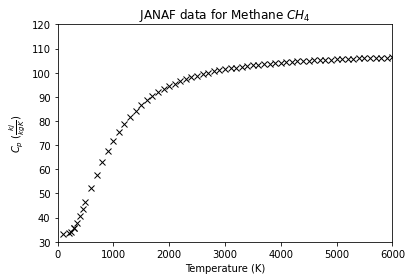

In [46]:
p = plt.plot(data['TK'], data['Cp'], 'kx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature (K)")
y = plt.ylabel(r'$C_p$ ($\frac{kj}{kg K}$)')

## 插值

假设我们要对这组数据进行插值

先导入一维插值函数 `interp1d`

    interp1d(x,y)

In [53]:
from scipy.interpolate import interp1d

In [54]:
ch4_cp = interp1d(data['TK'], data['Cp'])

`interp1d` 的返回值可以像函数一样接受输入，并返回插值的结果

单个输入值，注意返回的是数组

In [55]:
ch4_cp(382.2)

array(39.57)

输入数组，返回的是对应的数组

In [56]:
ch4_cp([32.2, 323.2])

array([10.71, 36.71])

默认情况下，输入值要在插值允许的范围内，否则插值会报错：

In [57]:
ch4_cp(8752)

ValueError: A value in x_new is above the interpolation range.

但我们可以通过参数设置允许超出范围的值存在：

In [58]:
ch4_cp = interp1d(data['TK'], data['Cp'], bounds_error=False)

不过由于超出范围，所以插值的输出是非法值

In [59]:
ch4_cp(8752)

array(nan)

可以使用指定值代替这些非法值

In [60]:
ch4_cp = interp1d(data['TK'], data['Cp'], bounds_error=False, fill_value=-999.25)

In [61]:
ch4_cp(8752)

array(-999.25)

### 线性插值

`interp1d` 默认的插值方法是线性，关于线性插值的定义，请参见：

- 维基百科-线性插值： https://zh.wikipedia.org/wiki/%E7%BA%BF%E6%80%A7%E6%8F%92%E5%80%BC
- 百度百科-线性插值： http://baike.baidu.com/view/4685624.htm

其基本思想是，已知相邻两点 $x_1,x_2$ 对应的值 $y_1,y_2$ ，那么对于 $(x_1,x_2)$ 之间的某一点 $x$ ，线性插值对应的值 $y$ 满足：点 $(x,y)$ 在 $(x_1,y_1),(x_2,y_2)$ 所形成的线段上。

应用线性插值：

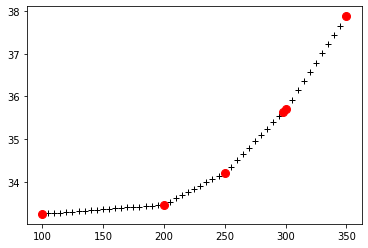

In [69]:
T = np.arange(100, 355, 5)
plt.plot(T, ch4_cp(T), '+k')
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

其中红色的圆点为原来的数据点，黑色的十字点为对应的插值点，可以明显看到，相邻的数据点的插值在一条直线上。

### 多项式插值

我们可以通过 `kind` 参数来调节使用的插值方法，来得到不同的结果：

- `nearest` 最近邻插值
- `zero` 0阶插值
- `linear` 线性插值
- `quadratic` 二次插值
- `cubic` 三次插值
- `4,5,6,7` 更高阶插值

最近邻插值：(黑色十字为插值)

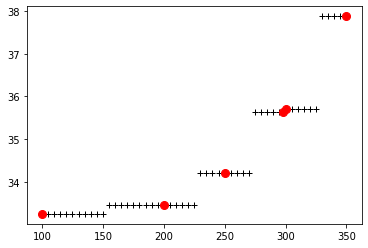

In [75]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind='nearest')
p = plt.plot(T, cp_ch4(T), 'k+')
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

0阶插值

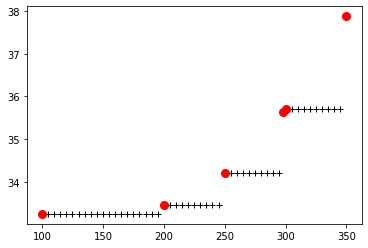

In [80]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind='zero')
p = plt.plot(T, cp_ch4(T), 'k+')
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

二次插值

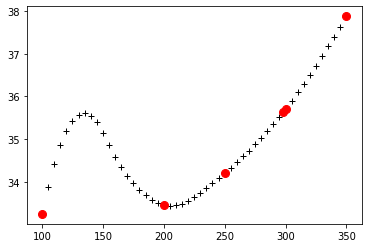

In [82]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind='quadratic')
p = plt.plot(T, cp_ch4(T), 'k+')
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

三次插值

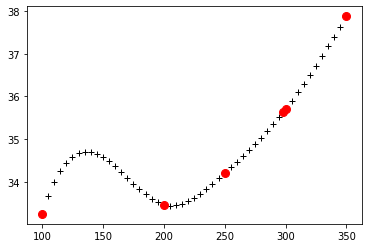

In [83]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind='cubic')
p = plt.plot(T, cp_ch4(T), 'k+')
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

事实上，我们可以使用更高阶的多项式插值，只要将 `kind` 设为对应的数字即可：

四次多项式插值：(`并不能实现`)

In [88]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind=4)
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

ValueError: Odd degree for now only. Got 4.

可以参见：

- 维基百科-多项式插值：https://zh.wikipedia.org/wiki/%E5%A4%9A%E9%A1%B9%E5%BC%8F%E6%8F%92%E5%80%BC
- 百度百科-插值法：http://baike.baidu.com/view/754506.htm

对于二维乃至更高维度的多项式插值：

In [89]:
from scipy.interpolate import interp2d, interpnd

其使用方法与一维类似

### 径向基函数

关于径向基函数，可以参阅

- 维基百科-Radial basis fucntion：https://en.wikipedia.org/wiki/Radial_basis_function

径向基函数，简单来说就是点 $x$ 处的函数值只依赖于 $x$ 与某点 $c$ 的距离：

$$\Phi(x,c) = \Phi(\|x-c\|)$$

In [90]:
x = np.linspace(-3,3,100)

常用的径向基（`RBF`）函数有：

高斯函数：

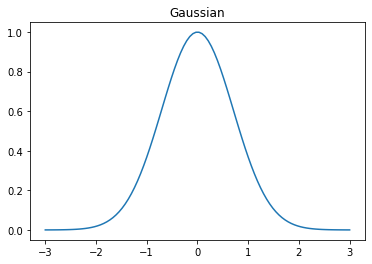

In [92]:
plt.plot(x, np.exp(-1 * x ** 2))
t =plt.title('Gaussian')

`Multiquadric` 函数

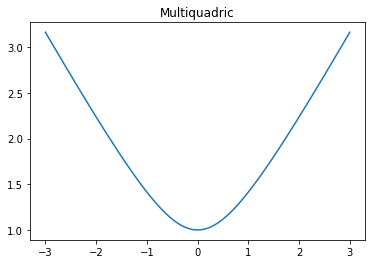

In [93]:
plt.plot(x, np.sqrt(1 + x**2))
t = plt.title('Multiquadric')

`Inverse Multiquadric` 函数

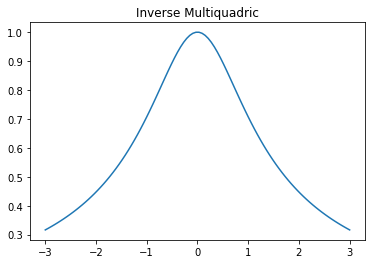

In [95]:
plt.plot(x, 1./ np.sqrt(1 + x**2))
t = plt.title('Inverse Multiquadric')

### 径向基函数插值

对于径向基函数，其插值的公式为：

$$
f(x) = \sum_j n_j \Phi(\|x-x_j\|)
$$

我们通过数据点 $x_j$ 来计算出 $n_j$ 的值，来计算 $x$ 处的插值结果。

In [96]:
from scipy.interpolate.rbf import Rbf

使用 `multiquadric` 核的

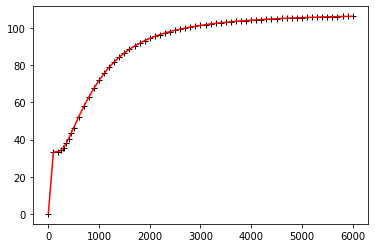

In [100]:
cp_rbf = Rbf(data['TK'], data['Cp'], function='multiquadric')
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

使用 `Gaussian` 核的

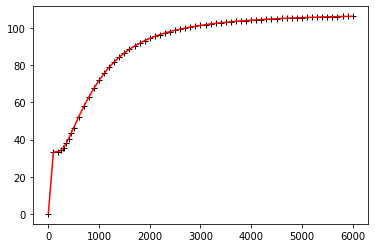

In [101]:
cp_rbf = Rbf(data['TK'], data['Cp'], function='gaussian')
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

使用 `nverse_multiquadric` 核：

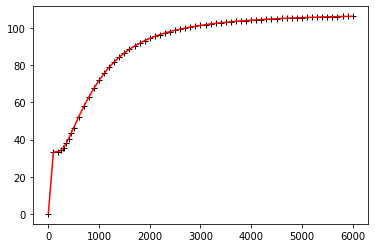

In [102]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "inverse_multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

不同的 `RBF` 核的结果也不同。(`结果是一样的`)

### 高维 `RBF` 插值

In [103]:
from mpl_toolkits.mplot3d import Axes3D

三维数据点

In [105]:
x, y = np.mgrid[-np.pi/2 : np.pi/2 : 5j, -np.pi/2 : np.pi/2.5 :5j]
z = np.cos(np.sqrt(x**2 + y**2))

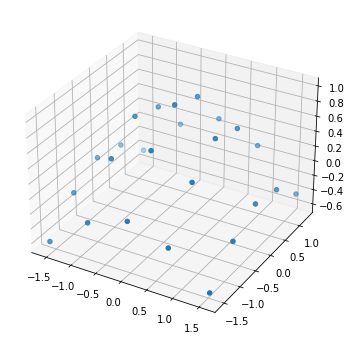

In [123]:
plt.figure(figsize=(12,6))
# ax = fig.gca(projection='3d')         #新版会有建议使用其他
# ax = plt.subplot(projection='3d')
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)

三维 `RBF` 插值

In [110]:
zz = Rbf(x,y,z)

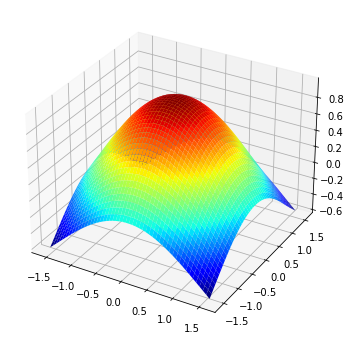

In [127]:
xx, yy = np.mgrid[-np.pi/2 : np.pi/2 : 50j, -np.pi/2 : np.pi/2 : 50j]
plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')
ax.plot_surface(xx,yy,zz(xx,yy), rstride=1, cstride=1, cmap=plt.cm.jet)